<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/Silrouette(KMeans%2B%2B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

In [ ]:
# 시험용 데이터 세트를 구성한다
X, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

In [ ]:
# K-means 알고리즘으로 시험용 데이터를 3 그룹으로 분류한다 (k = 3)
# 중심적 무작위(random) 선정의 단점을 보완하기 위해 나온 K-means++를 사용
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
km = km.fit(X)
y_km = km.predict(X)

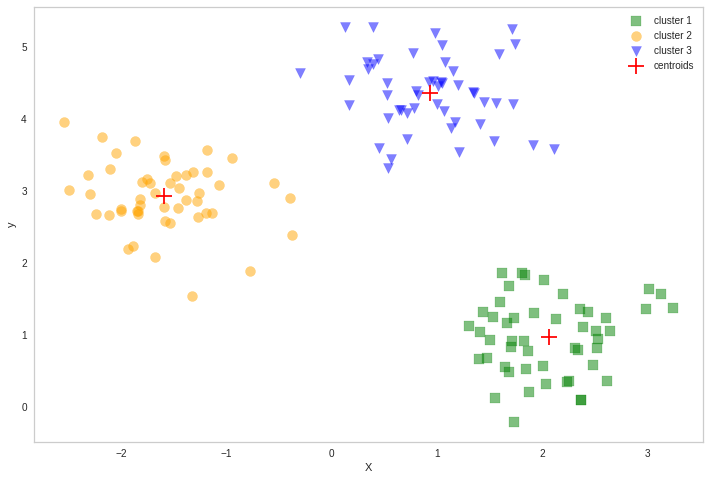

In [ ]:
# 분류 결과를 표시한다
plt.figure(figsize=(12, 8))
plt.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=100, c='green', marker='s', alpha=0.5, label='cluster 1')
plt.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=100, c='orange', marker='o', alpha=0.5, label='cluster 2')
plt.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=100, c='blue', marker='v', alpha=0.5, label='cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, marker='+', c='red', label='centroids')
plt.legend()
plt.grid()
plt.ylabel('y')
plt.xlabel('X')
plt.show()

In [ ]:
trc_silhouette = []
for i in range(2, 10):
    # K-means 알고리즘으로 시험용 데이터를 3 그룹으로 분류한다 (k = 3)
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    km = km.fit(X)
    y_km = km.predict(X)
    silhouette_vals = silhouette_samples(X, y_km, metric='euclidean')
    trc_silhouette.append(np.mean(silhouette_vals))

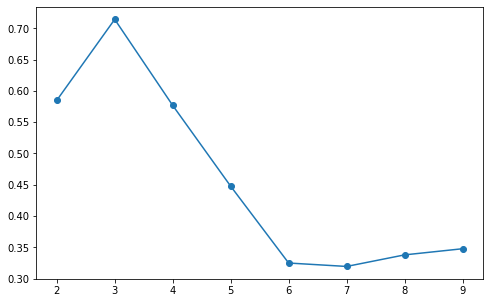

In [ ]:
# 실루엣 계수를 확인한다.
plt.figure(figsize=(8, 5))
plt.plot(np.arange(2, 10), trc_silhouette, marker='o')
plt.show()

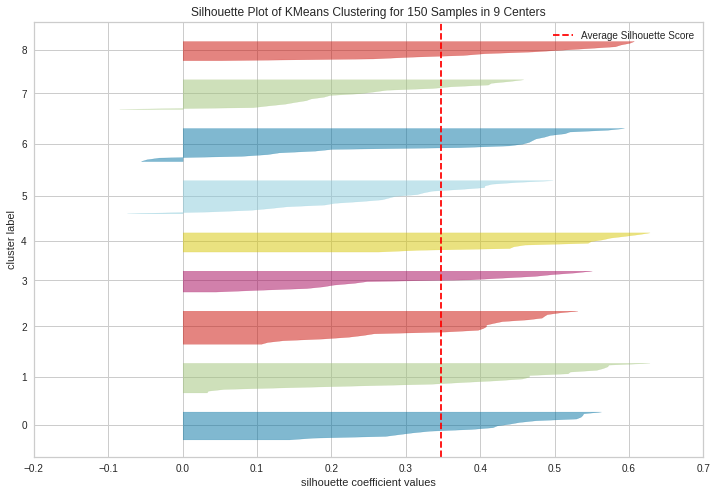

In [ ]:
 X축은 실루엣 계수 값이고, Y 축은 개별 군집과 이에 속하는 데이터 이다.
 
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=i, 
               init='k-means++', 
               n_init=10, max_iter=300, 
               tol=1e-04, random_state=0)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(12, 8))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

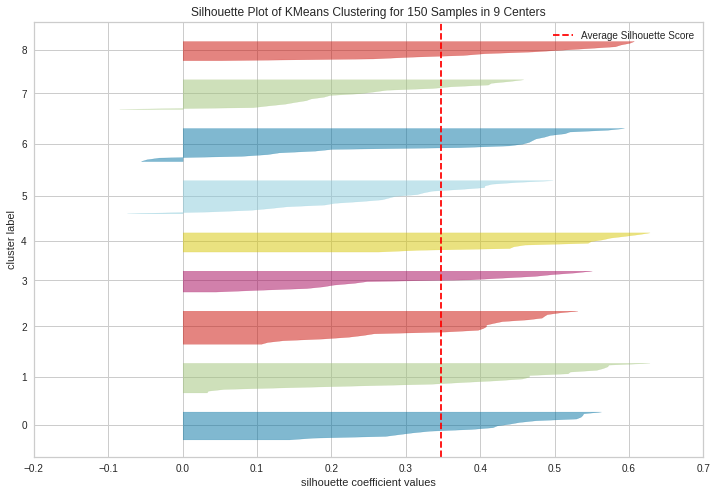

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7faccde6e910>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=9, random_state=0))

In [ ]:
from yellowbrick.cluster import silhouette_visualizer

plt.figure(figsize=(12, 8))
# Use the quick method and immediately show the figure
silhouette_visualizer(KMeans(n_clusters=i,
                             init='k-means++', 
                             n_init=10, max_iter=300, 
                             tol=1e-04, random_state=0), X, colors='yellowbrick')

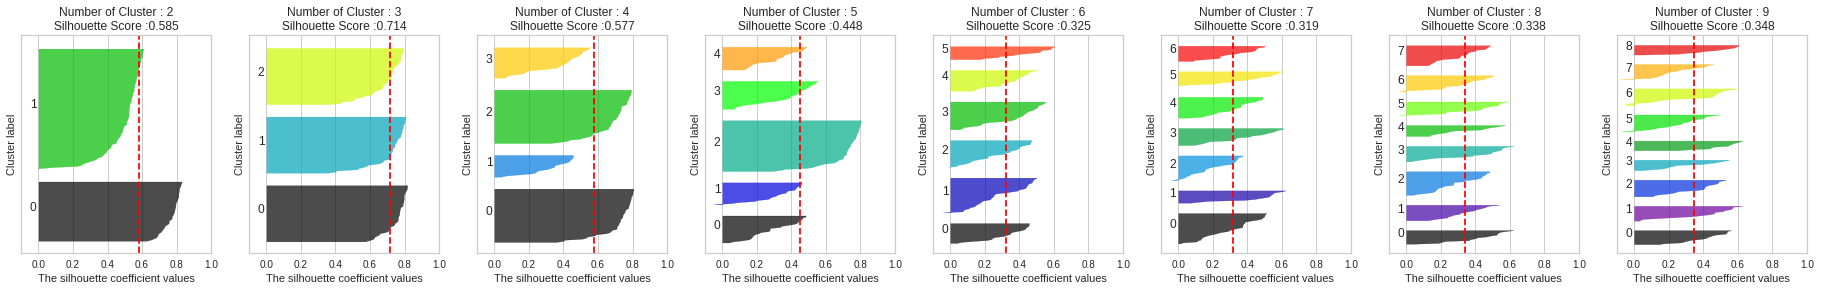

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
# 자료출처 : https://ariz1623.tistory.com/224
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5, 6, 7,8, 9], X)